# Direct Sequence Spread Spectrum

This workbook is a port of some MATLAB code I found on File Exchanger (https://uk.mathworks.com/matlabcentral/fileexchange/28420-direct-sequence-spread-spectrum-ds-ss-). It is also an opportunity for me to learn how to use Jupyter!

To start with we need to generate some bits to transmit.

<IPython.core.display.Javascript object>


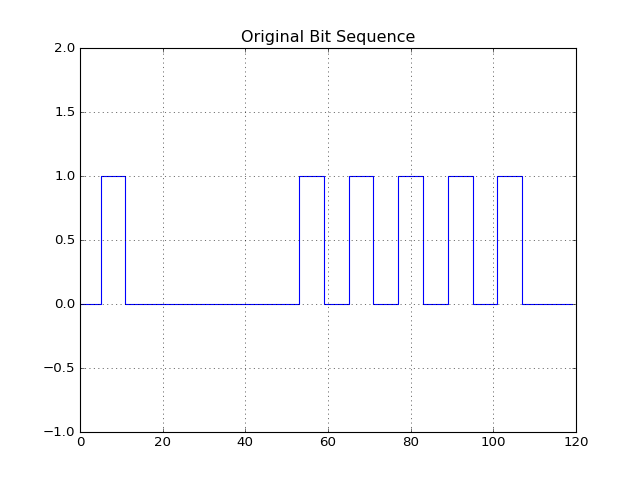

In [38]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

nBits = 20
# make sure we generate the same random number each time otherwise I will get confused
np.random.seed(1)
messageRaw = np.round(np.random.rand(nBits))
nExp = 6
sig = np.zeros(nBits*nExp)

# expand out the bit stream, this is a bit like an interpolate
for x in np.nditer(np.arange(nBits)):
    if messageRaw[x] == 1:
        sig[x*nExp:(x+1)*nExp] = np.ones(nExp)
    else:
        sig[x*nExp:(x+1)*nExp] = np.zeros(nExp)
plt.figure()        
plt.step(np.arange(nBits*nExp), sig)
plt.ylim(-1, 2)
plt.title("Original Bit Sequence")
plt.grid(True, which='both')


In the next step, we have to create a pseudo-random bit pattern for spreading

<IPython.core.display.Javascript object>


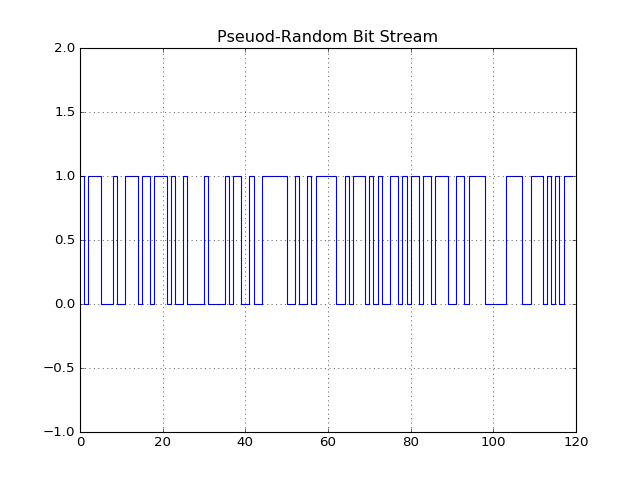

In [39]:
spreadSig = np.round(np.random.rand(nBits*nExp))
plt.figure()
plt.step(np.arange(nBits*nExp),spreadSig)
plt.ylim(-1,2)
plt.title('Pseuod-Random Bit Stream')
plt.grid(True)

Now we can XOR our original signal with our spreading signal

<IPython.core.display.Javascript object>


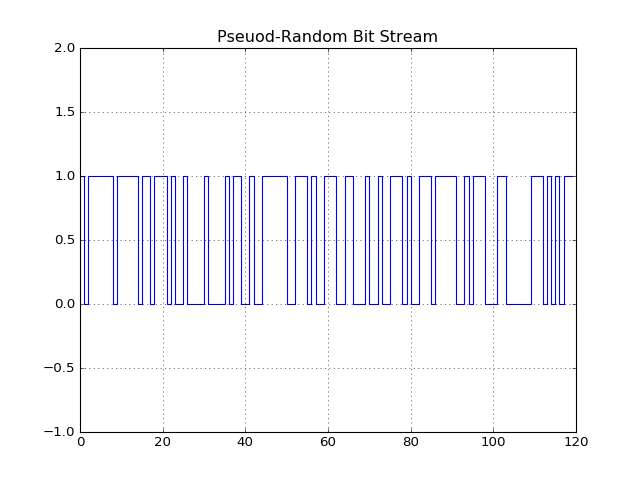

In [43]:
hoppedSignal = np.logical_xor(sig, spreadSig);
plt.figure()
plt.step(np.arange(nBits*nExp),hoppedSignal)
plt.ylim(-1,2)
plt.title('Hopped Pattern')
plt.grid(True)

What we have done so far was all at "baseband", we now need to modulate it up to the carrier frequency

<IPython.core.display.Javascript object>


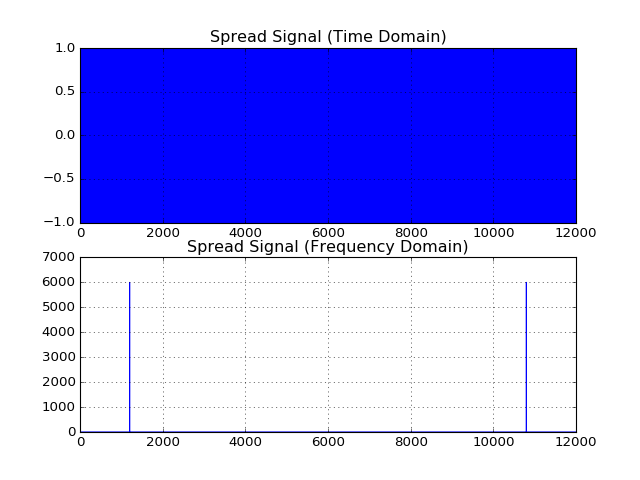

In [55]:
t = np.arange(100)
nt = np.size(t)
fc = 0.1
c1 = np.cos(2*np.pi*fc*t)           # in-phase
c2 = np.cos(2*np.pi*fc*t + np.pi/2) # quadrature
pbSig = np.zeros(nt*np.size(hoppedSignal))

for x in np.arange(np.size(hoppedSignal)):
    if hoppedSignal[x] == 1:
        pbSig[x*nt:(x+1)*nt] = c1
    else:
        pbSig[x*nt:(x+1)*nt] = c1

pbSigF = np.fft.fft(pbSig)        
        
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(pbSig)
plt.title('Spread Signal (Time Domain)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.abs(pbSigF))
plt.title('Spread Signal (Frequency Domain)')
plt.grid(True)

Well this is not what I expected.